# Customer Churn Analysis

Problem Statement:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Importing the dataset

In [3]:
df1=pd.read_csv("churn.csv")
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print('No. of Rows:', df1.shape[0])
print('No. of Columns:', df1.shape[1])

No. of Rows: 7043
No. of Columns: 21


# Explonatory Data Analysis

In [5]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df1.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3594,9026-LHEVG,Female,0,No,No,9,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,40.75,359.4,No


In [7]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There is totally 21 columns including target variable. 18 columns are object datatype, 2 columns are integer datatype, only one columns is float datatype.

# Checking Null Values

In [10]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

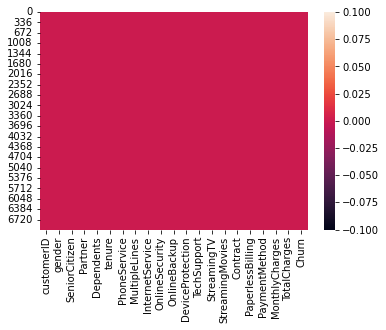

In [11]:
sns.heatmap(df1.isnull())

In [12]:
# Checking the value counts of each columns
for i in df1.columns:
        print(df1[i].value_counts())
        print('_______________________________')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
_______________________________
Male      3555
Female    3488
Name: gender, dtype: int64
_______________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
_______________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
_______________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
_______________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
_______________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
_______________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
______________________

These are the value counts of all the columns.

In [13]:
df1['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can observe that the "TotalCharges" has continuous data, but when we checked the datatype it is showing object datatype due to some reason, also if we notice the value counts, 11 rows of this column has blank data. Let's handle this column.

In [14]:
# checking the space in TotalCharges column
df1.loc[df1['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By viewing the TotalCharges we can find this column has empty space as values but it was showing 0 missing values in this columns. Let's fill this column by some values and then we will convert this into float type.

In [15]:
df1['TotalCharges']=df1['TotalCharges'].replace(" ", np.nan)
df1['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

Since we saw 11 rows with blank spaces in TotalCharges column, here we have replaced them with nan values. Also checked the values counts for the same column.

In [16]:
# Converting object data type to float data type
df1['TotalCharges'] = df1['TotalCharges'].astype(float)
df1['TotalCharges'].dtype

dtype('float64')

Since the column TotalCharges had all float numbers in the dataset but due to some reason it showed as object data type. For this reason we have converted it into float data type.

In [17]:
# Let's check the null values again
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since we have flled the blank spaces in TotalCharges column with nan values, it is showing 11 null values in that column. Replacing the NAN values using mean method as the column TotalCharges is continuous in nature.

In [18]:
df1['TotalCharges'].fillna(df1['TotalCharges'].mean(), inplace=True)

<AxesSubplot:>

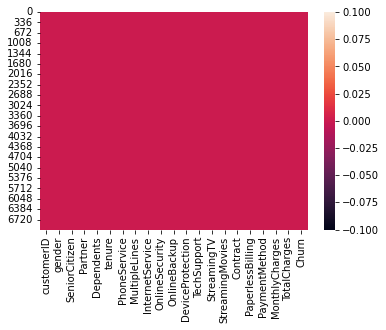

In [19]:
sns.heatmap(df1.isnull())

There are no missing values in any of the column.

By info method we can get the information about the dataset which includes indexing type, column type, non-null values and memory usage. Here we can see there are 3 types of data present, 2 integer data type, 2 float data type, and remaining 17 columns have object data type. We will use encoding methods to convert this object type data into numerical data in later part.

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
# Seperating Numerical and Categorical Columns

# Checking for categorical columns
categorical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n", categorical_col,"\n")

# Checking for Numerical columns
numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_col.append(i)
print("Numeical columns are:\n", numerical_col)

Categorical columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeical columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
# Checking number of unique values in each column

df1.nunique().to_frame("No of Unique Values")

,No of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset. Here CustomerID column has the data of unique ID given to the customers which is not required for the predictions. Let's drop this column.

In [23]:
# Dropping CustomerID column
df1.drop("customerID",axis=1,inplace=True)

In [24]:
df1.shape

(7043, 20)

In [25]:
# Checking the list of counts of target
df1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

There are two categories present in the target column Churn. Namely "No" and "Yes".

In [26]:
# Checking the unique values in target column
df1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are two categories in the column Churn namely No and Yes. We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

# Summary Statistics

In [27]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

---> The counts of all the 3 columns are same which means there are no missing values in the dataset.

---> The mean value is greater than the median(50%) in tenure and TotaCharges columns which means the data is skewed to right in these columns.

---> The data in the column MonthlyCharges have mean value less than median that means the data is skewed to left.

---> By summarising the data we can observe there is huge difference between 75% and max hence there are outliers present in the data which we will remove them later on using appropriate methods.

---> We can also notice the Standard deviation, min, 25% percentile values from this describe method.

# Data Visualization

# Univaraiate Analysis

Plotting Categorical columns

No     5174
Yes    1869
Name: Churn, dtype: int64


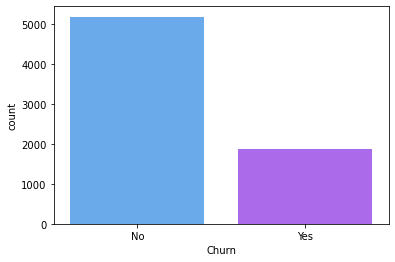

In [28]:
print(df1["Churn"].value_counts())
sns.countplot(df1["Churn"],palette="cool")
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned. This leads to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

Male      3555
Female    3488
Name: gender, dtype: int64


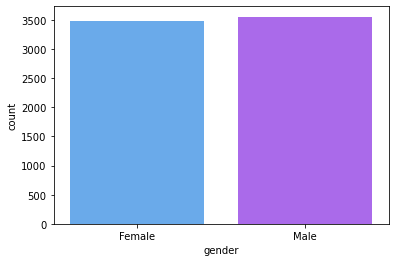

In [29]:
print(df1["gender"].value_counts())
sns.countplot(df1["gender"],palette="cool")
plt.show()

From the plot we can observe the total number of male and female customers are almost same, but still the count of male is 3555 which is high compared to count of female which has 3488 counts.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


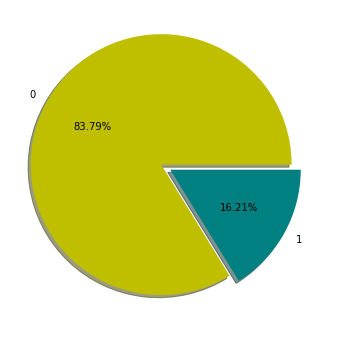

In [30]:
print(df1['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["y","teal"]
ax.pie(df1['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()

Here 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0 is high in data compared to 1 which means the number non seniorcitizens are quite high compared to senior citizens data in the given dataset. Around 83% of the customers are non senior citizens and only 16% are senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


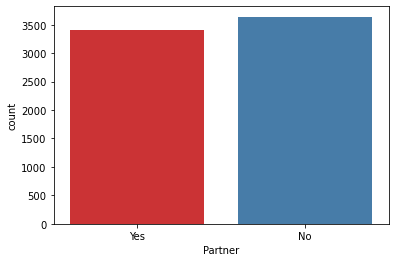

In [31]:
print(df1["Partner"].value_counts())
sns.countplot(df1["Partner"],palette="Set1")
plt.show()

The count for partner details are almost similar and the customers who do not have partners are bit higher than who have partners.

No     4933
Yes    2110
Name: Dependents, dtype: int64


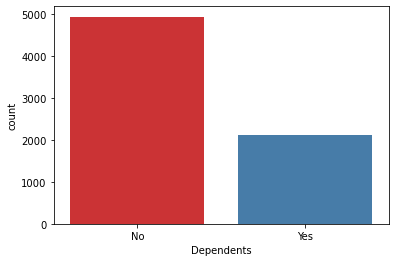

In [32]:
print(df1["Dependents"].value_counts())
sns.countplot(df1["Dependents"],palette="Set1")
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 70% of customers have dependents only 29.96% have no dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


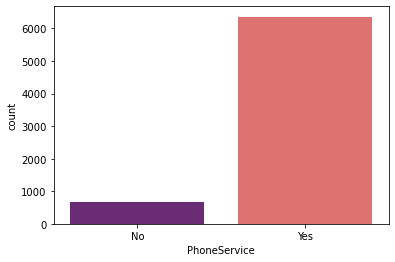

In [33]:
print(df1["PhoneService"].value_counts())
sns.countplot(df1["PhoneService"],palette="magma")
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


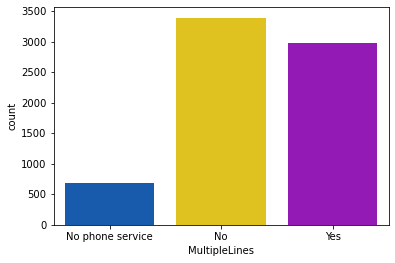

In [34]:
print(df1["MultipleLines"].value_counts())
sns.countplot(df1["MultipleLines"],palette="prism")
plt.show()

The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


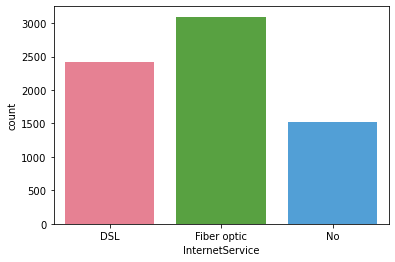

In [35]:
print(df1["InternetService"].value_counts())
sns.countplot(df1["InternetService"],palette="husl")
plt.show()

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


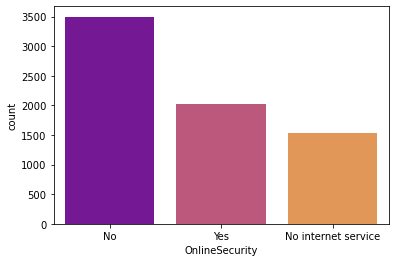

In [36]:
print(df1["OnlineSecurity"].value_counts())
sns.countplot(df1["OnlineSecurity"],palette="plasma")
plt.show()

It is obvious that the customers who have internet services they needs online security and who do not own any internet services, they do not need any online security. But from the count plot we can observe the majority of customers who have internet services but they do not use any online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


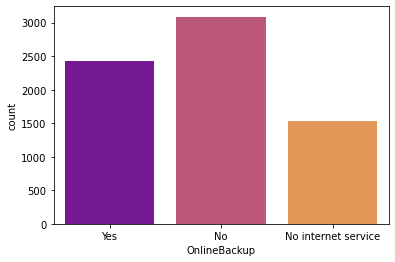

In [37]:
print(df1["OnlineBackup"].value_counts())
sns.countplot(df1["OnlineBackup"],palette="plasma")
plt.show()

It is obious that the customers who do not own internet services and online security, they do not need online backup usage. From the plot we can see the majority of customers who own internet services they do not have Online backup and the customers who own internet services have very less online backup. Also the customers who do not have internet services have very less online backup counts compared tp others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


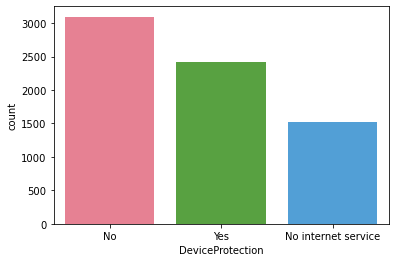

In [38]:
print(df1["DeviceProtection"].value_counts())
sns.countplot(df1["DeviceProtection"],palette="husl")
plt.show()

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


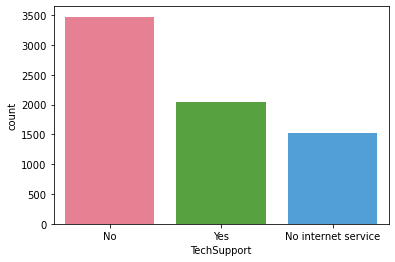

In [39]:
print(df1["TechSupport"].value_counts())
sns.countplot(df1["TechSupport"],palette="husl")
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support. Around 49% of the people do not need any technical support and only 29% needs.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


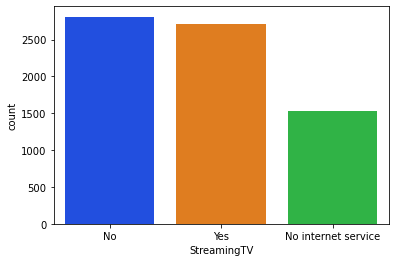

In [40]:
print(df1["StreamingTV"].value_counts())
sns.countplot(df1["StreamingTV"],palette="bright")
plt.show()

The customers who do not use streamin TV have little bit high in numbers than the customers who do use Streaming TV. And the customers who do not own internet they do not have this service much.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


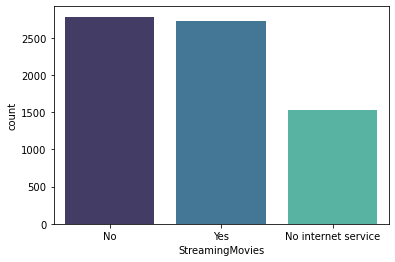

In [41]:
print(df1["StreamingMovies"].value_counts())
sns.countplot(df1["StreamingMovies"],palette="mako")
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


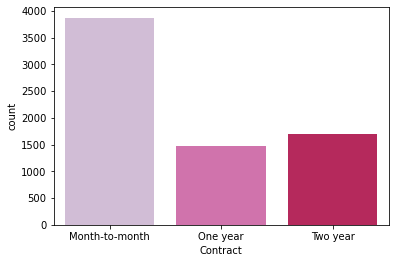

In [42]:
print(df1["Contract"].value_counts())
sns.countplot(df1["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


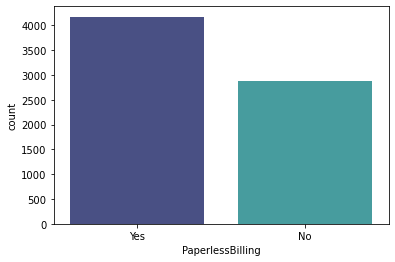

In [43]:
print(df1["PaperlessBilling"].value_counts())
sns.countplot(df1["PaperlessBilling"],palette="mako")
plt.show()

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


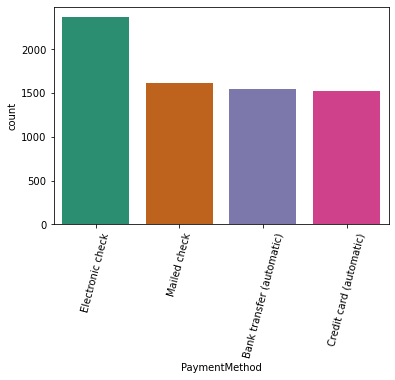

In [44]:
print(df1["PaymentMethod"].value_counts())
sns.countplot(df1["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.

Plotting Numerical columns

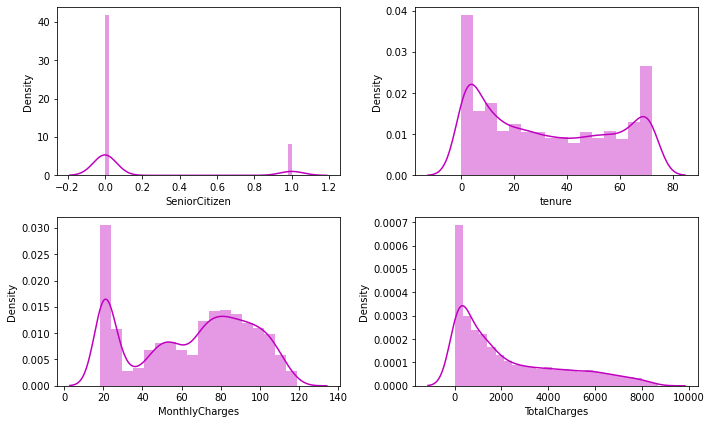

In [45]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df1[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have skewness.

# Bivariate Analysis

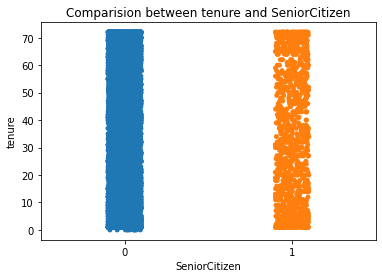

In [46]:
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df1)
plt.show()

There is no significant difference between the features, here both the feature are in equal length.

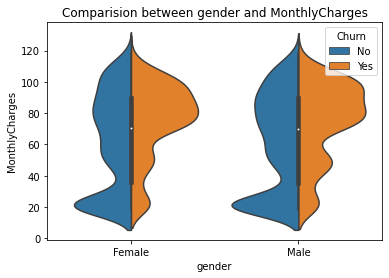

In [47]:
plt.title("Comparision between gender and MonthlyCharges")
sns.violinplot( x = "gender",y = "MonthlyCharges", data = df1, hue="Churn",split=True)
plt.show()

Most both male and female customers with monthly charges above 60 have high chances of getting churned.

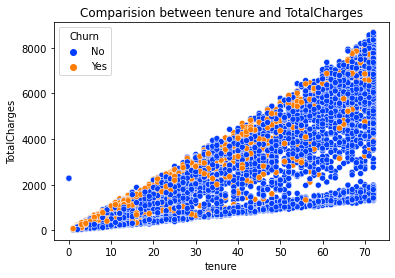

In [48]:
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot( x = "tenure",y = "TotalCharges", data = df1, hue="Churn",palette="bright")
plt.show()

Here we can notice the strong linear relation between the features. As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

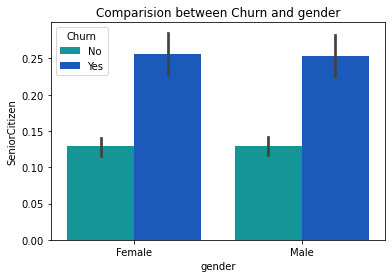

In [49]:
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df1, palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case.

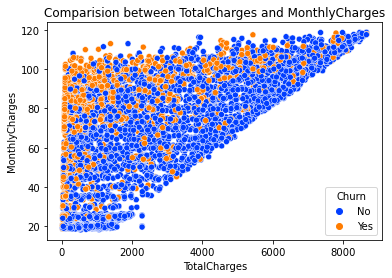

In [50]:
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df1, hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges. Also the if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

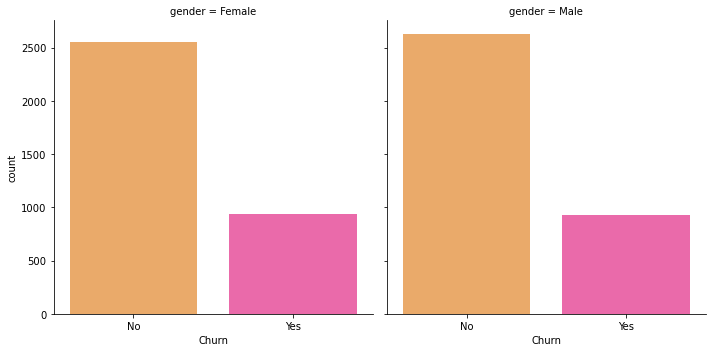

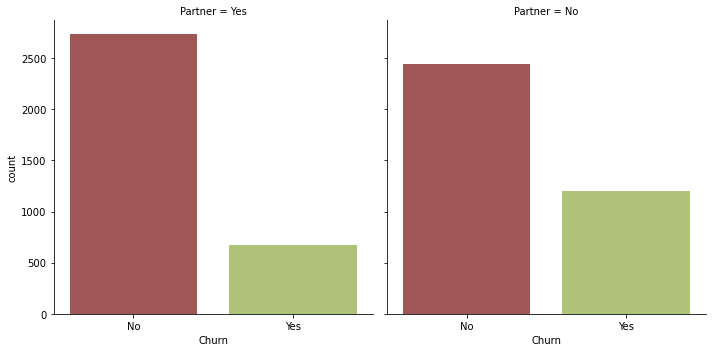

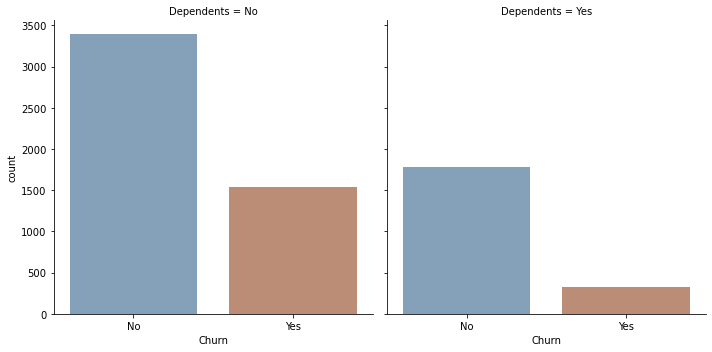

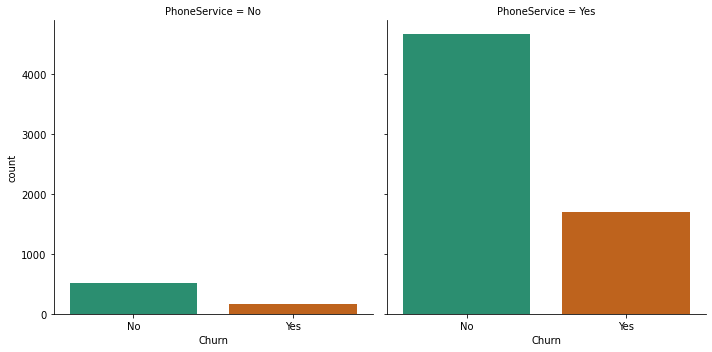

In [51]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df1, kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df1, palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df1, palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df1, palette="Dark2",kind="count")
plt.show()

---> In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

---> In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

---> The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

---> In the last plot we can notice the customers who have phone service have high tendency of getting churned.

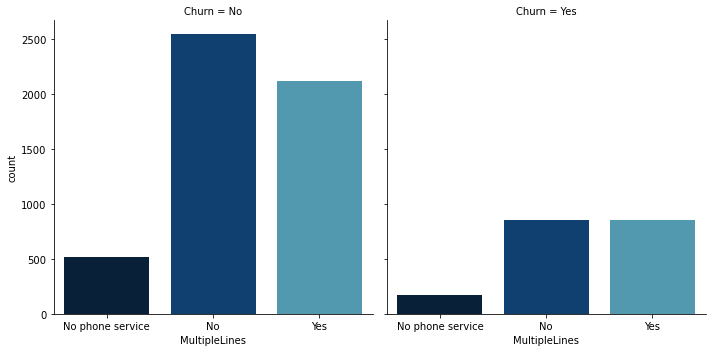

In [52]:
sns.catplot(x= 'MultipleLines', col='Churn', palette="ocean", kind="count", data=df1)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

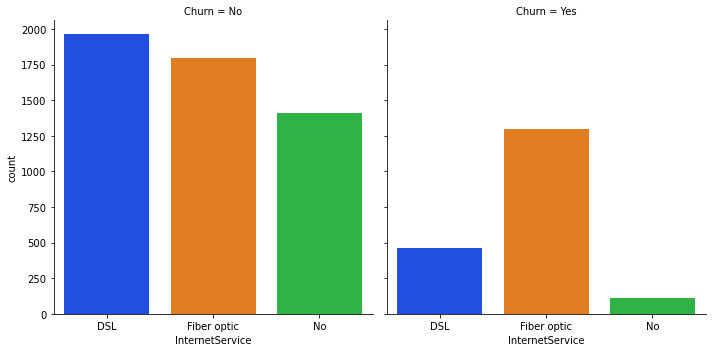

In [53]:
sns.catplot(x='InternetService', col='Churn', palette="bright", kind="count", data=df1)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

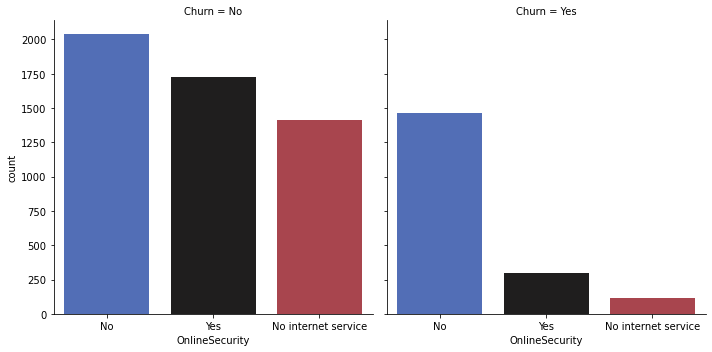

In [54]:
sns.catplot(x='OnlineSecurity', col='Churn', palette="icefire", kind="count", data=df1)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

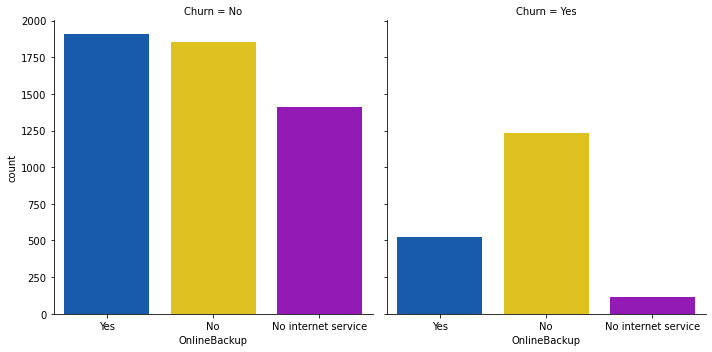

In [55]:
sns.catplot(x='OnlineBackup', col='Churn', palette="prism", kind="count", data=df1)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

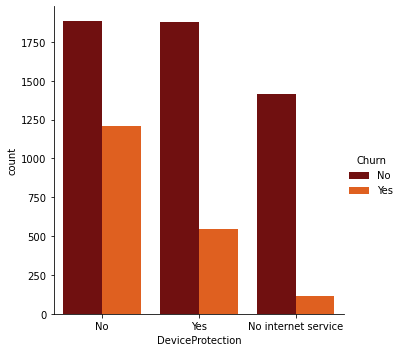

In [56]:
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df1)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

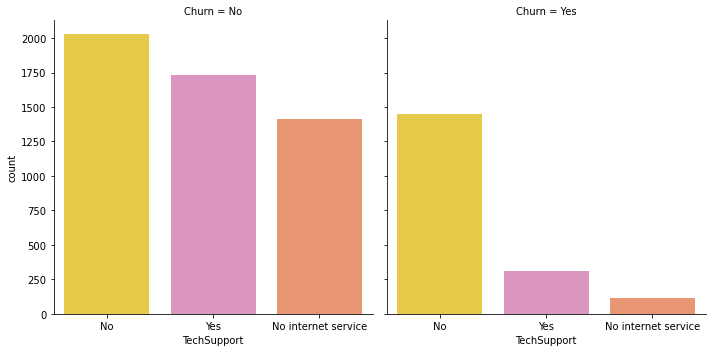

In [57]:
sns.catplot(x='TechSupport', col='Churn', palette="Set2_r", kind="count", data=df1)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

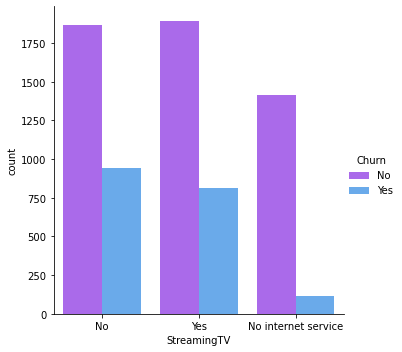

In [58]:
sns.catplot(x='StreamingTV', hue='Churn', palette="cool_r", kind="count", data=df1)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

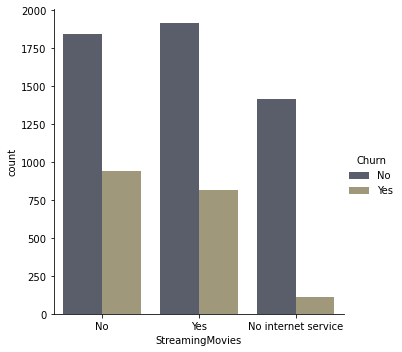

In [59]:
sns.catplot(x='StreamingMovies', hue='Churn', palette="cividis", kind="count", data=df1)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

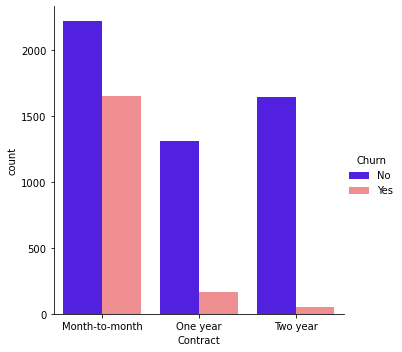

In [60]:
sns.catplot(x='Contract', hue='Churn', palette="gnuplot2", kind="count", data=df1)
plt.show()

The customers who have churned are mostly having month to month contract.

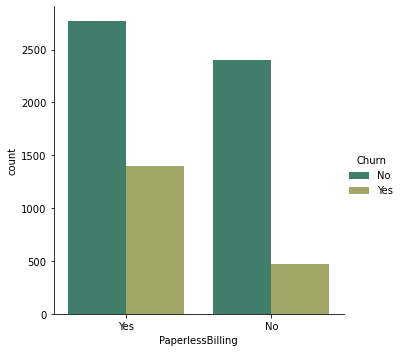

In [61]:
sns.catplot(x='PaperlessBilling', hue='Churn', palette="gist_earth", kind="count", data=df1)
plt.show()

The customers who prefer paperless billing they have high churn rate.

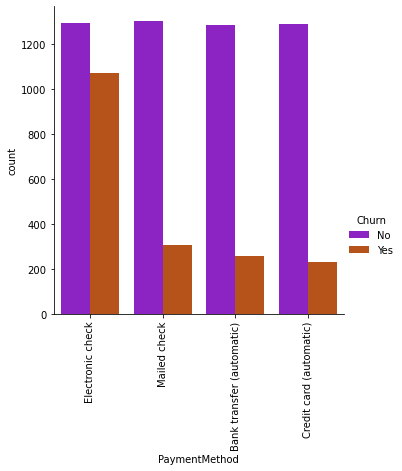

In [62]:
sns.catplot(x='PaymentMethod', hue='Churn', palette="gnuplot", kind="count", data=df1)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

# Multivariate Analysis

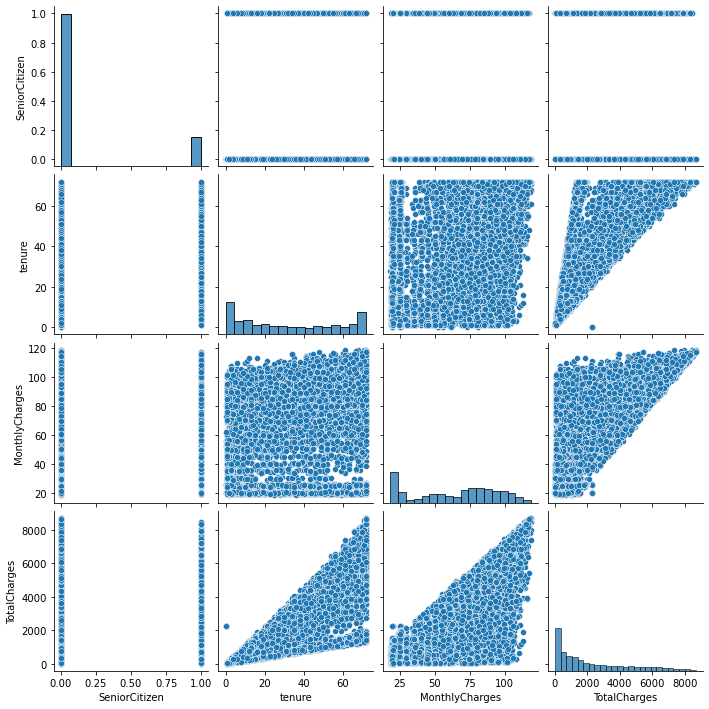

In [63]:
sns.pairplot(df1)

---> The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

---> The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

---> There are no outliers in any of the columns but let's plot box plot to identify the outliers.

# Checking Outliers

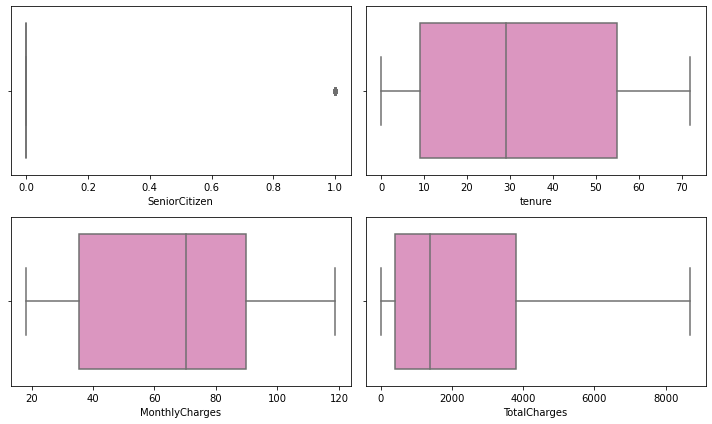

In [64]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df1[column],palette="Set2_r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

# Skewness

In [65]:
df1.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [66]:
df1["TotalCharges"] = np.cbrt(df1["TotalCharges"])

In [67]:
df1.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

We can see the skewness has been reduced in TotalCharges column.

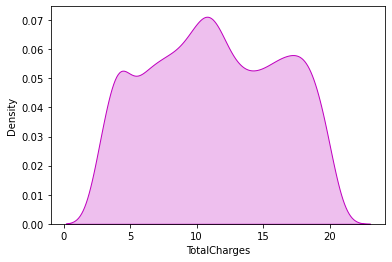

In [68]:
sns.distplot(df1["TotalCharges"],color="m",kde_kws={"shade": True},hist=False)
plt.show()

The looks almost normal and skewness is also removed.

# Encoding

In [69]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


Now we have converted the categorical columns into numerical columns using Ordinal Encoding method.

In [70]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.

# Correlation

In [71]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

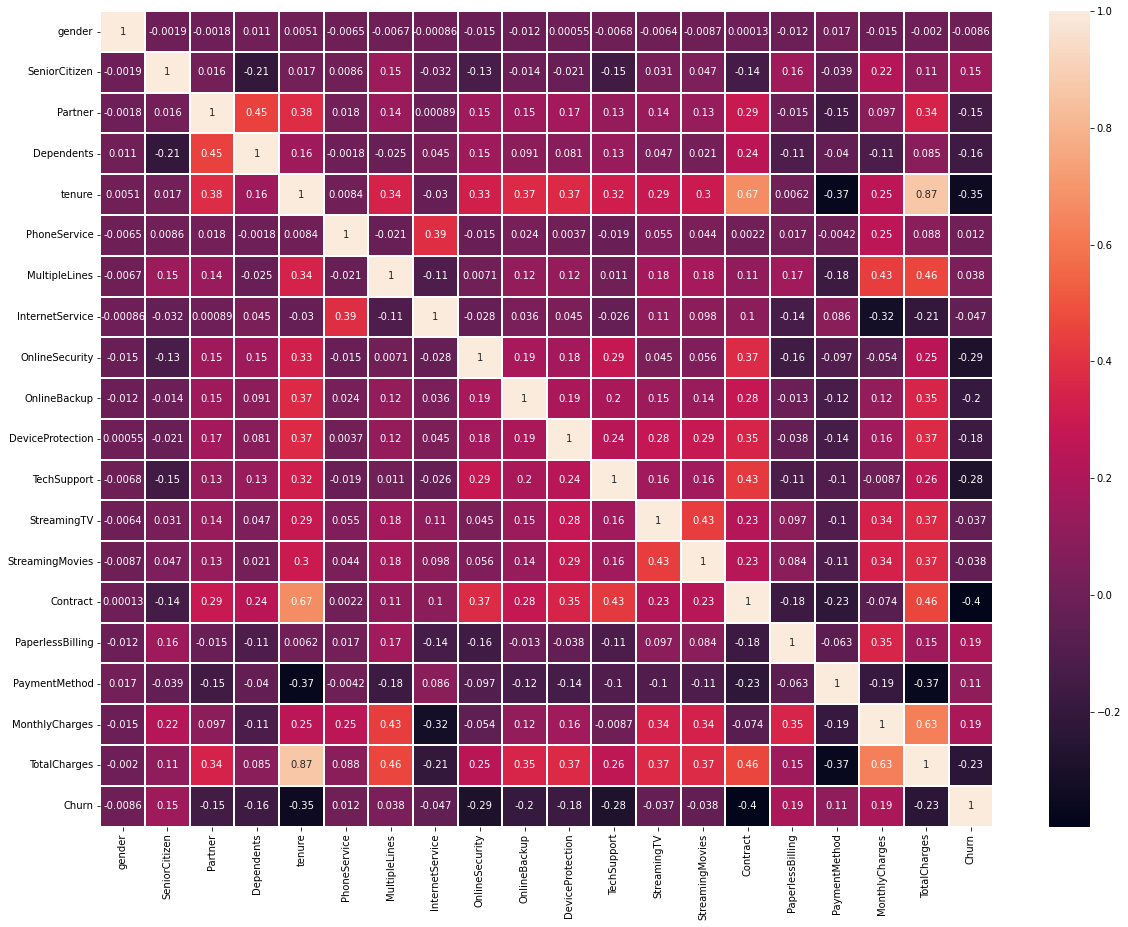

In [72]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=.1,annot=True)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

---> There is no much positive correlation between the target and features.

---> The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

---> The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

---> Also the column gender has very less correlation with the label, we can drop it if necessary.

---> The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

# Splitting the dataset into two parts: Input and Target Variable

In [74]:
x = df1.drop("Churn", axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066


In [76]:
x.shape

(7043, 19)

In [75]:
y = df1["Churn"]
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [77]:
y.shape

(7043,)

# Scaling

In [78]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

In the heat map we have found some features having high correlation between each other which means multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

# Checking VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [80]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [81]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


All the columns have VIF less than 10which means the data is free from multicollinearity problem.

In [82]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

# OverSampling

In [83]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [84]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

# Finding the best random state

In [85]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.7932367149758454  on Random_state  100


# Creating train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [88]:
x_train.shape

(7243, 18)

In [89]:
x_test.shape

(3105, 18)

In [90]:
y_train.shape

(7243,)

In [91]:
y_test.shape

(3105,)

# Logistic Regression

In [92]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 79.32367149758454
[[1192  365]
 [ 277 1271]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1557
         1.0       0.78      0.82      0.80      1548

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [93]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.7771574402906488


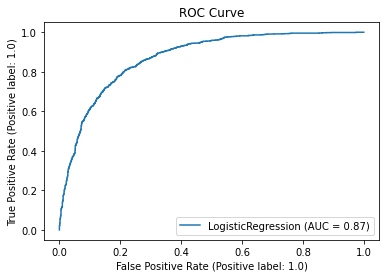

In [94]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

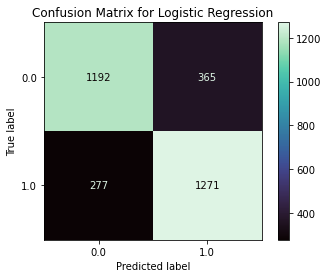

In [95]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# DecisionTree Classifier

In [96]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 79.25925925925927
[[1240  317]
 [ 327 1221]]
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      1557
         1.0       0.79      0.79      0.79      1548

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [97]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.7846059731532654


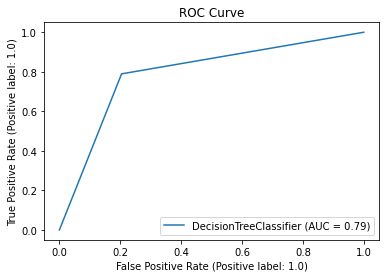

In [98]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

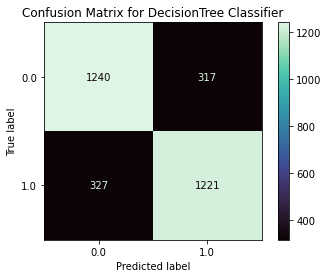

In [99]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# KNeighbors Classifier

In [100]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 78.84057971014494
[[1063  494]
 [ 163 1385]]
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      1557
         1.0       0.74      0.89      0.81      1548

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



In [101]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.7856617236733656


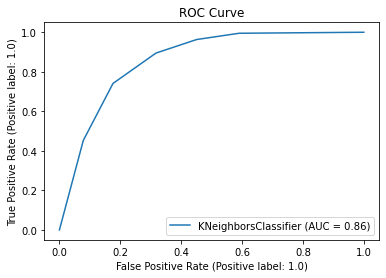

In [102]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

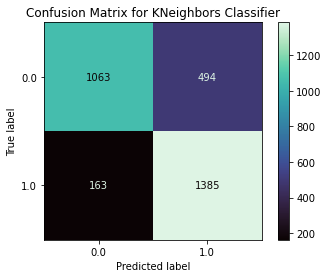

In [103]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector Classifier

In [104]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 82.99516908212561
[[1242  315]
 [ 213 1335]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1557
         1.0       0.81      0.86      0.83      1548

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [105]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.8109827847474683


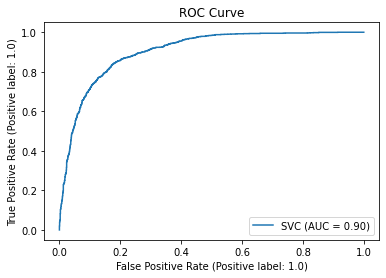

In [106]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sv, x_test, y_test)
plt.title("ROC Curve")
plt.show()

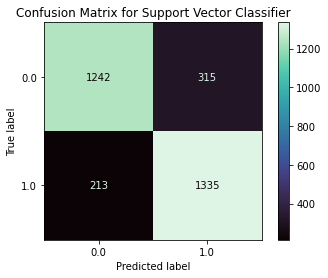

In [107]:
metrics.plot_confusion_matrix(sv, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Ensemble Technique

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)  # testing accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 86.57004830917874
[[1345  212]
 [ 205 1343]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1557
         1.0       0.86      0.87      0.87      1548

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



In [109]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.8548611548905747


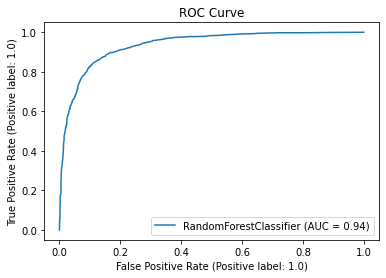

In [110]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

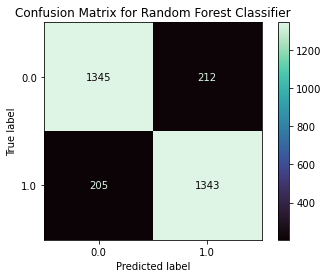

In [111]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [112]:
RandomForestClassifier()

RandomForestClassifier()

In [113]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [114]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [116]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [117]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [118]:
RandomForestClassifier()

RandomForestClassifier()

In [119]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=300)

In [120]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.837037037037037

# Saving the best model

In [121]:
import joblib

joblib.dump(rf,'churnmodel.obj')

Churn_loadmodel=joblib.load('Churnmodel.obj')
Churn_loadmodel.predict(x_test)

array([1., 1., 1., ..., 0., 1., 1.])

In [122]:
conclusion=pd.DataFrame([Churn_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Original,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
